# 📊 Customer Churn Prediction  
### **By Vanshika Gupta**

This project builds a complete machine learning pipeline to predict telecom customer churn and identify the key behavioral drivers behind customer retention and dissatisfaction.

The workflow includes:

- Data cleaning & preprocessing  
- Exploratory Data Analysis (EDA)  
- Feature engineering  
- Handling class imbalance using SMOTE 
- Training multiple ML models  
- Evaluating models using accuracy, recall, precision, F1-score, and ROC-AUC  
- Extracting business insights  
- Making data-driven recommendations  

##### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

##### Load the dataset

In [5]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Exploratory Data Analysis

In [7]:
df.shape

(7043, 21)

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.drop(columns= 'customerID', inplace= True)

In [10]:
df.duplicated().sum()

22

In [11]:
df = df.drop_duplicates()

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
# check blank space 
(df == ' ').sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
# replace blank space with nan
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [16]:
# count how many blank space
(df['TotalCharges'] == ' ').sum()

0

In [17]:
# change datatype
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [18]:
df['TotalCharges'].isnull().sum()

11

In [19]:
# handle null
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [20]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [21]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
df.describe(include= np.number)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2288.964517
std,0.368947,24.534965,30.069001,2265.315517
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,411.150000
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

##### Feature Selection

In [25]:
df_cat = df.select_dtypes(include= 'object')
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [26]:
df_num = df.select_dtypes(include= np.number)
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


##### EDA Visuals

Churn Distribution

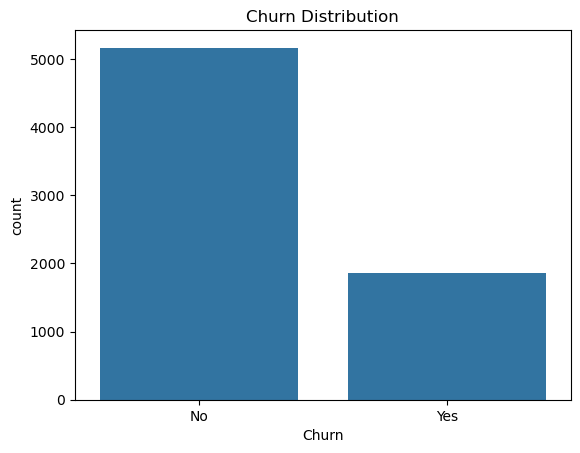

Churn
No     0.735508
Yes    0.264492
Name: proportion, dtype: float64

In [29]:
sns.countplot(data= df, x='Churn')
plt.title("Churn Distribution")
plt.show()

df['Churn'].value_counts(normalize=True)

Numerical Distribution

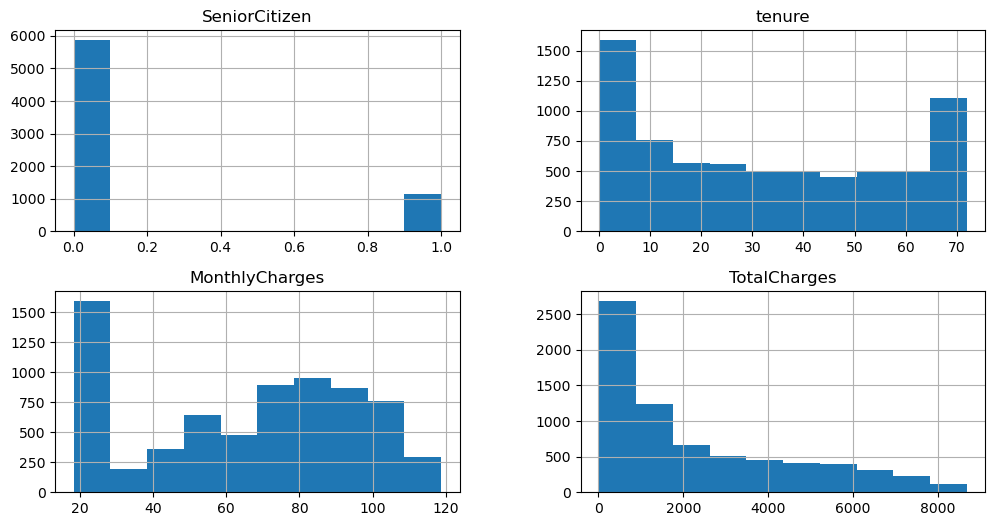

In [31]:
df_num.hist(figsize=(12,6))
plt.show()

Categorical Feature Distribution

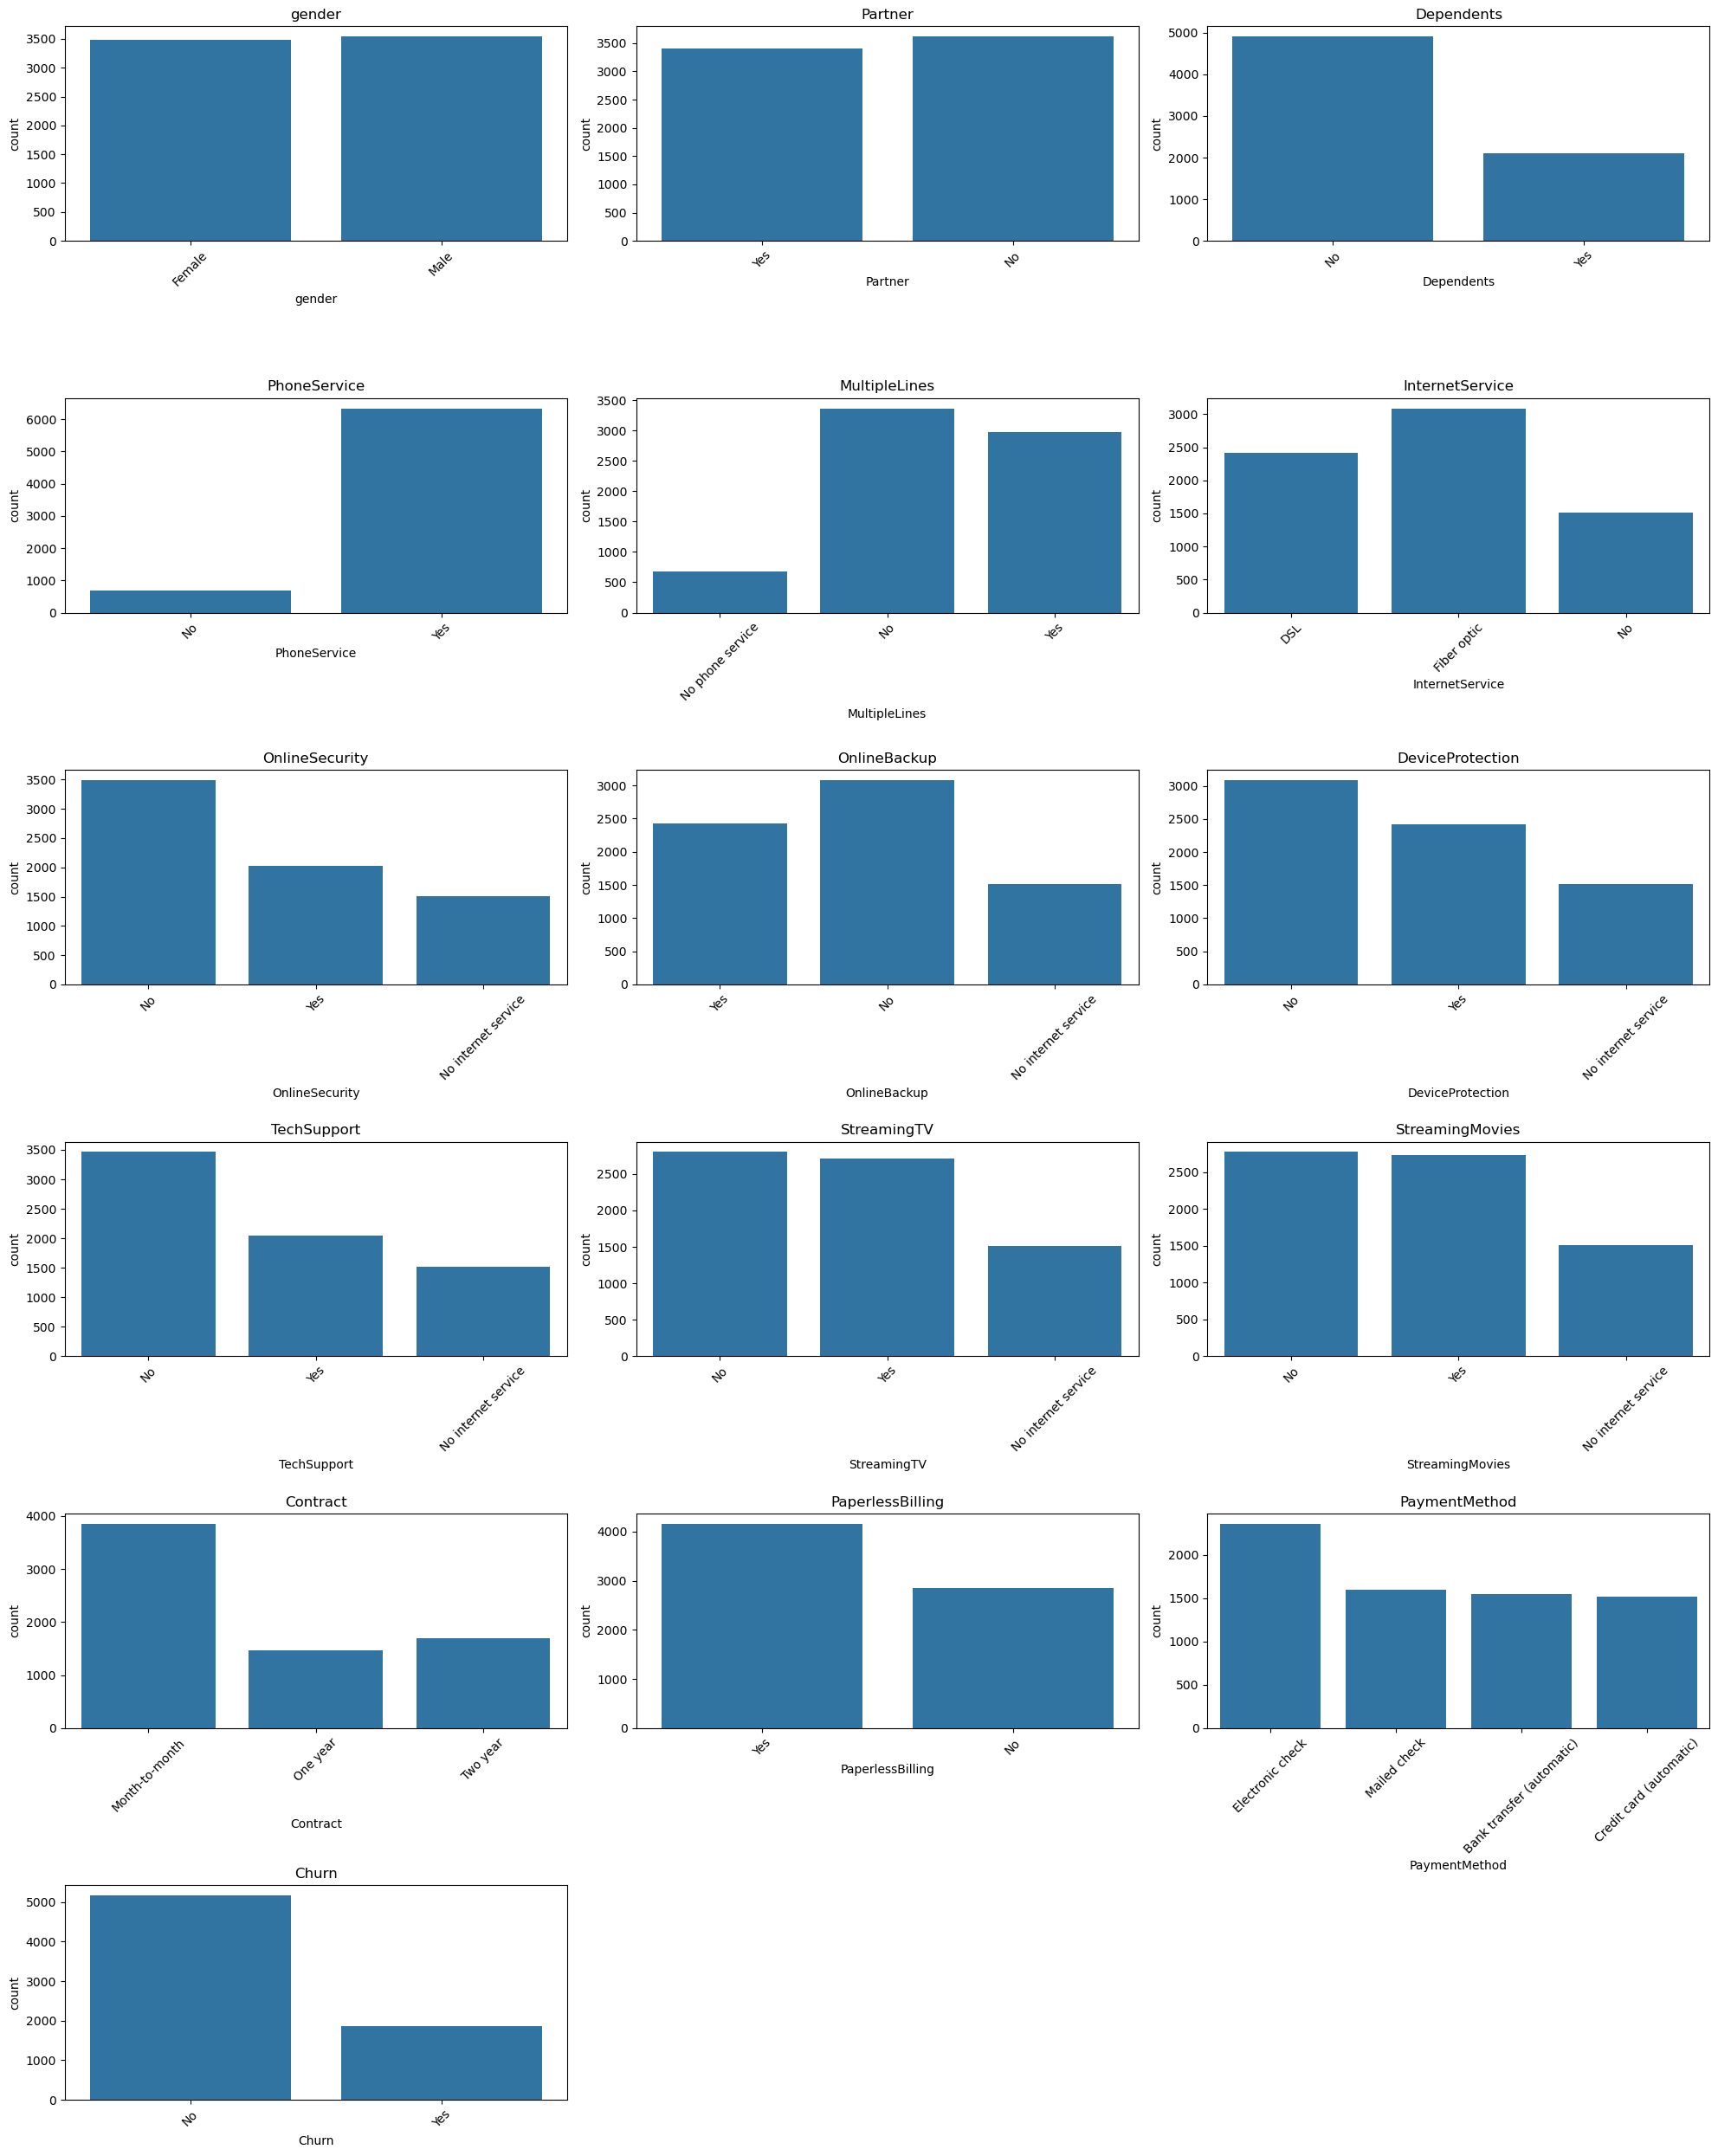

In [33]:
cat_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 25))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols)//3 + 1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Detect Outliers

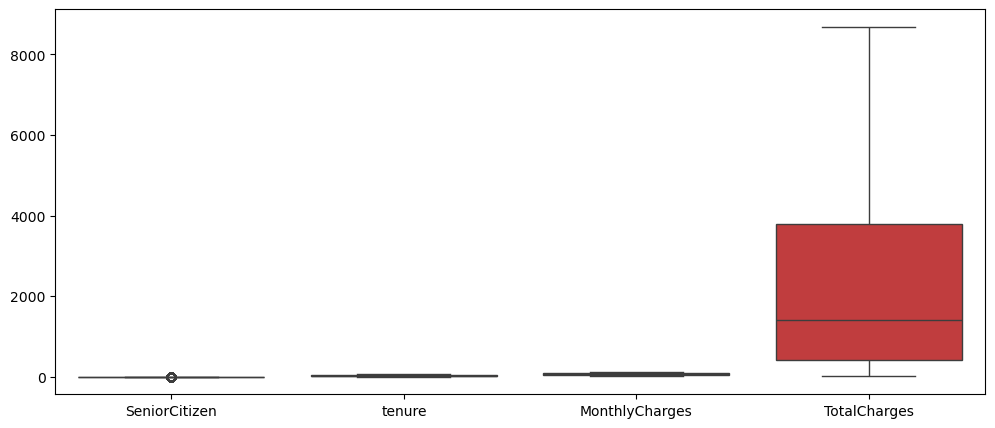

In [35]:
plt.figure(figsize=(12,5))
sns.boxplot(data= df_num)
plt.show()

Check Multicollinearity

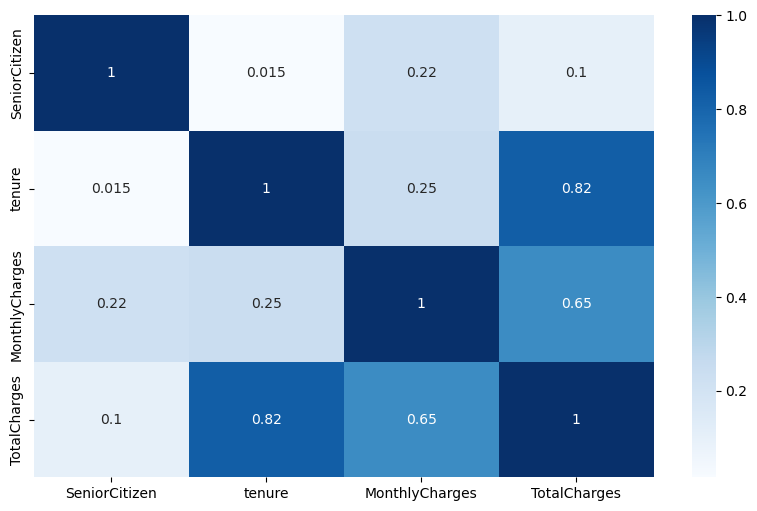

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(), annot=True, cmap='Blues')
plt.show()

A correlation of **0.82** was observed between *tenure* and *TotalCharges*, which is expected since TotalCharges is derived from monthly charges over tenure.  
Tree-based models are not affected by multicollinearity, so no feature was removed. Logistic Regression may show coefficient instability, but overall performance remains unaffected.  
Therefore, the multicollinearity observed is acceptable and does not require feature removal.

## Train Test Split

Separate x and y

In [41]:
x = df.drop(columns= 'Churn')
y = df['Churn'].map({'Yes': 1, 'No': 0})       # Encode y

Encode x

In [43]:
x = pd.get_dummies(x, drop_first=True).astype(int)

train-test split on the encoded data

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state= 42, test_size= 0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4914, 30)
(2107, 30)
(4914,)
(2107,)


##### Feature Scale

In [47]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [48]:
# Convert scaled arrays back to DataFrame
x_train_scaled = pd.DataFrame(x_train_scaled, columns= x.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x.columns)

##### Check Imbalance

In [50]:
df['Churn'].value_counts()

Churn
No     5164
Yes    1857
Name: count, dtype: int64

##### Fix Imbalance

In [52]:
smote = SMOTE(random_state=42)

In [53]:
x_train_res, y_train_res = smote.fit_resample(x_train_scaled, y_train)

In [54]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Churn
0    3608
1    1306
Name: count, dtype: int64
After SMOTE: Churn
0    3608
1    3608
Name: count, dtype: int64


## Logistic Regression Model

In [56]:
# Train model 
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train_res, y_train_res)

LogisticRegression(max_iter=1000)

Check Performance of Model

In [58]:
# Predict on TEST data
y_pred = log_model.predict(x_test_scaled)

In [59]:
# Evaluate on TEST data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1556
           1       0.52      0.79      0.63       551

    accuracy                           0.75      2107
   macro avg       0.71      0.77      0.72      2107
weighted avg       0.81      0.75      0.77      2107



In [60]:
# Predict on SMOTE-balanced training data
y_pred_train = log_model.predict(x_train_res)

In [61]:
# Evaluate on TRAIN (SMOTE) data
print(classification_report(y_train_res, y_pred_train))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      3608
           1       0.76      0.81      0.79      3608

    accuracy                           0.78      7216
   macro avg       0.78      0.78      0.78      7216
weighted avg       0.78      0.78      0.78      7216



Evaluate using Confusion Matrix

<Axes: >

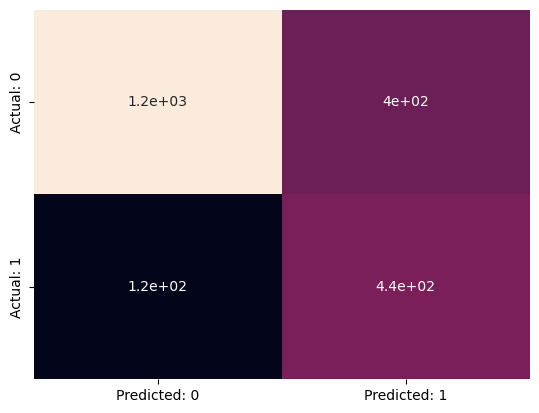

In [63]:
cm = confusion_matrix(y_test, y_pred)
cm2 = pd.DataFrame(data= cm, columns= ['Predicted: 0', 'Predicted: 1'], index= ['Actual: 0', 'Actual: 1'])
sns.heatmap(cm2, annot= True, cbar= False)

In [64]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [65]:
print(f'True Negative: {TN}')
print(f'False Positive: {FP}')
print(f'False Negative: {FN}')
print(f'True Positive: {TP}')

True Negative: 1154
False Positive: 402
False Negative: 115
True Positive: 436


In [66]:
# Test model
y_pred_train = log_model.predict(x_train_res)

In [67]:
# Evaluate model
print(confusion_matrix(y_train_res, y_pred_train))

[[2690  918]
 [ 668 2940]]


## Decision Tree Model

In [69]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=10, max_features= 8, max_leaf_nodes=12, random_state=42)

In [70]:
dt.fit(x_train_res, y_train_res) 

DecisionTreeClassifier(max_depth=10, max_features=8, max_leaf_nodes=12,
                       random_state=42)

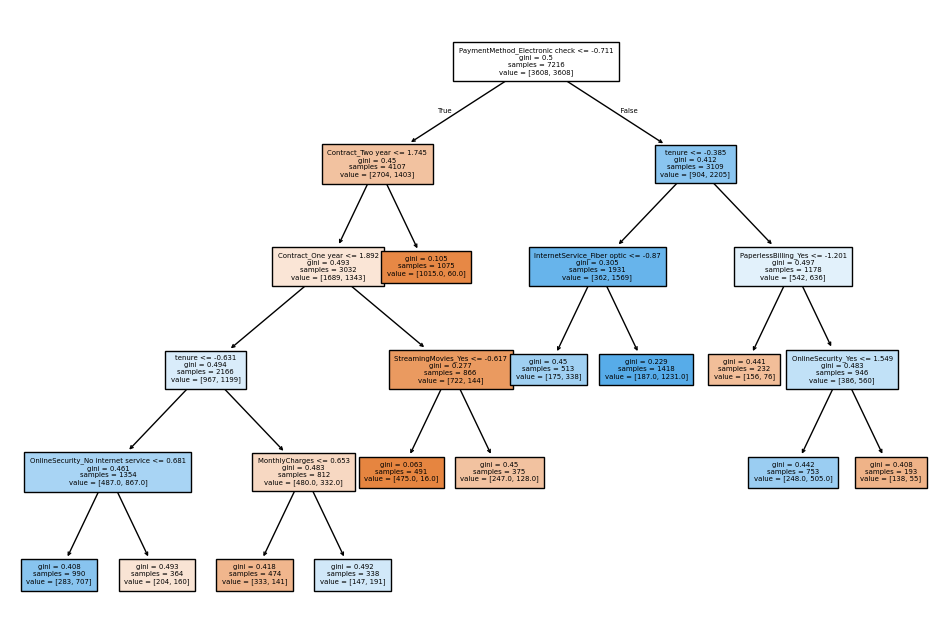

In [71]:
plt.figure(figsize=(12,8))
tree.plot_tree(dt, filled=True, fontsize=5, feature_names= x_train_res.columns)
plt.show()

Check Performance of Model

In [73]:
y_pred_dt= dt.predict(x_test)

In [74]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1556
           1       0.26      1.00      0.41       551

    accuracy                           0.26      2107
   macro avg       0.13      0.50      0.21      2107
weighted avg       0.07      0.26      0.11      2107



In [75]:
y_pred_dt_train = dt.predict(x_train_res)

In [76]:
print(classification_report(y_train_res, y_pred_dt_train))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      3608
           1       0.74      0.82      0.78      3608

    accuracy                           0.77      7216
   macro avg       0.77      0.77      0.77      7216
weighted avg       0.77      0.77      0.77      7216



Over-fitting in Decision Tree

Hyperparameter Tuning

In [79]:
# Base Model
dt = DecisionTreeClassifier(random_state=42)

# Parameter Grid 
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_leaf_nodes': [None, 10, 20, 30, 40]
}

# RandomizedSearchCV
dt_random = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=50,         
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the model
dt_random.fit(x_train_res, y_train_res)

# Best parameters
print("Best Parameters:", dt_random.best_params_, "\n")

# Get best model
best_dt = dt_random.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 8, 'max_leaf_nodes': None, 'max_depth': 7, 'criterion': 'gini'} 



In [80]:
# Test Predictions
y_pred_dt = best_dt.predict(x_test)
print("Decision Tree - Test Report:\n", classification_report(y_test, y_pred_dt))

# Train Predictions
y_pred_dt_train = best_dt.predict(x_train_res)
print("Decision Tree - Train Report:\n", classification_report(y_train_res, y_pred_dt_train))

# Accuracy Summary
print("Train Accuracy:", accuracy_score(y_train_res, y_pred_dt_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree - Test Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1556
           1       0.26      1.00      0.41       551

    accuracy                           0.26      2107
   macro avg       0.13      0.50      0.21      2107
weighted avg       0.07      0.26      0.11      2107

Decision Tree - Train Report:
               precision    recall  f1-score   support

           0       0.86      0.74      0.79      3608
           1       0.77      0.88      0.82      3608

    accuracy                           0.81      7216
   macro avg       0.81      0.81      0.80      7216
weighted avg       0.81      0.81      0.80      7216

Train Accuracy: 0.8054323725055432
Test Accuracy: 0.2615092548647366


## Random Forest Model

In [82]:
rf = RandomForestClassifier(n_estimators=20, random_state=42)

In [83]:
rf.fit(x_train_res, y_train_res)

RandomForestClassifier(n_estimators=20, random_state=42)

Check Performance of Model

In [85]:
y_pred_rf = rf.predict(x_test)

In [86]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1556
           1       0.26      1.00      0.41       551

    accuracy                           0.26      2107
   macro avg       0.13      0.50      0.21      2107
weighted avg       0.07      0.26      0.11      2107



In [87]:
y_pred_rf_train = rf.predict(x_train_res)

In [88]:
print(classification_report(y_train_res, y_pred_rf_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3608
           1       0.99      0.99      0.99      3608

    accuracy                           0.99      7216
   macro avg       0.99      0.99      0.99      7216
weighted avg       0.99      0.99      0.99      7216



##### ROC Curve

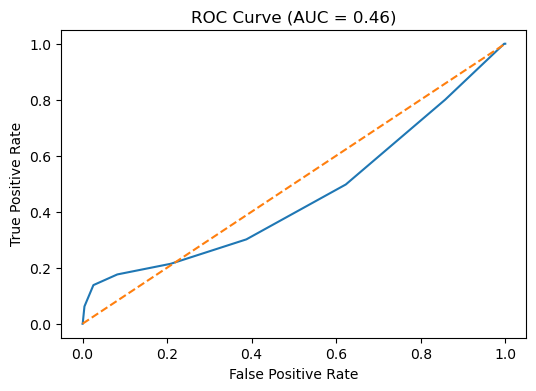

In [90]:
rf_probs = rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

##### Feature Importance of Random Forest

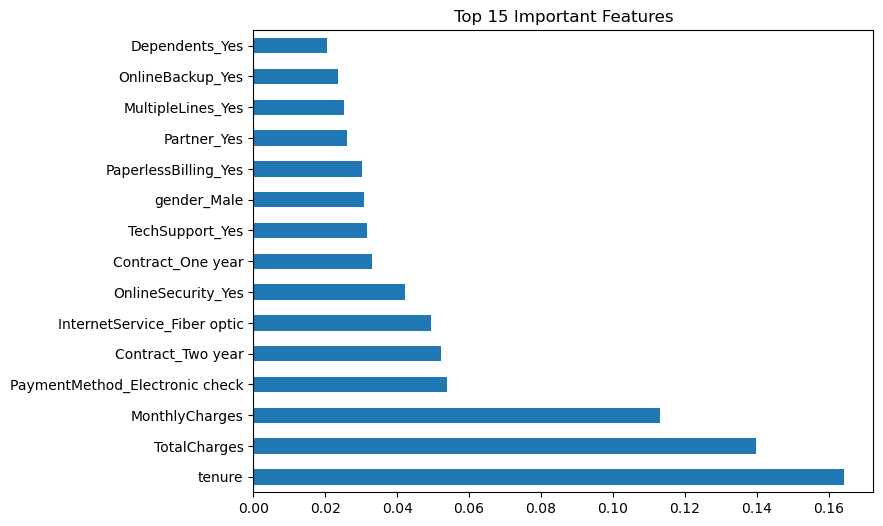

In [92]:
importances = pd.Series(rf.feature_importances_, index= x.columns)
importances.nlargest(15).plot(kind="barh", figsize=(8,6))
plt.title("Top 15 Important Features")
plt.show()

## Gradient Boosting Model

In [94]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train_res, y_train_res)

y_pred_gb = gb.predict(x_test)

print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1556
           1       0.26      1.00      0.41       551

    accuracy                           0.26      2107
   macro avg       0.13      0.50      0.21      2107
weighted avg       0.07      0.26      0.11      2107



## XGBoost Model

In [96]:
xgb = XGBClassifier(
    random_state=42,
    n_estimators=200,    
    learning_rate=0.1,   
    max_depth=5,        
    subsample=0.8,       
    colsample_bytree=0.8
)

xgb.fit(x_train_res, y_train_res)
y_pred_xgb = xgb.predict(x_test)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1556
           1       0.26      1.00      0.41       551

    accuracy                           0.26      2107
   macro avg       0.13      0.50      0.21      2107
weighted avg       0.07      0.26      0.11      2107



## AdaBoost Model

In [98]:
adb = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
adb.fit(x_train_res, y_train_res)

y_pred_adb = adb.predict(x_test)

print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1556
           1       0.26      1.00      0.41       551

    accuracy                           0.26      2107
   macro avg       0.13      0.50      0.21      2107
weighted avg       0.07      0.26      0.11      2107



## Model Comparison Table

In [100]:
models = {
    "Logistic Regression": y_pred,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "XGBoost": y_pred_xgb,
    "AdaBoost": y_pred_adb
}

# Probability predictions for ROC-AUC 
probs = {
    "Logistic Regression": log_model.predict_proba(x_test_scaled)[:,1],
    "Decision Tree": best_dt.predict_proba(x_test)[:,1],
    "Random Forest": rf.predict_proba(x_test)[:,1],
    "Gradient Boosting": gb.predict_proba(x_test)[:,1],
    "XGBoost": xgb.predict_proba(x_test)[:,1],
    "AdaBoost": adb.predict_proba(x_test)[:,1]
}

# Create comparison table
comparison = []

for model_name in models:
    y_pred = models[model_name]
    y_prob = probs[model_name]
    
    comparison.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Class=1)": precision_score(y_test, y_pred),
        "Recall (Class=1)": recall_score(y_test, y_pred),
        "F1-Score (Class=1)": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

comparison_df = pd.DataFrame(comparison)
comparison_df

,Model,Accuracy,Precision (Class=1),Recall (Class=1),F1-Score (Class=1),ROC-AUC
0,Logistic Regression,0.754627,0.520286,0.791289,0.627790,0.846919
1,Decision Tree,0.261509,0.261509,1.000000,0.414597,0.500000
2,Random Forest,0.261509,0.261509,1.000000,0.414597,0.456509
3,Gradient Boosting,0.261509,0.261509,1.000000,0.414597,0.387890
4,XGBoost,0.261509,0.261509,1.000000,0.414597,0.464004
5,AdaBoost,0.261509,0.261509,1.000000,0.414597,0.650272


# 📌 Final Model Selection 

### ✔ **Selected Model: Logistic Regression**

**Reasons:**

- Highest overall accuracy (**0.75**)  
- Best ROC-AUC (**0.84**)  
- High recall for churn class (**0.79**)  
- Stable and generalizes well on unseen data  
- Interpretable and business-friendly  

Tree-based models heavily overfitted on SMOTE-balanced data and performed poorly on the test set. Therefore, Logistic Regression is the most reliable model for deployment.

##### Predict on Unseen Data

In [103]:
new_customer = pd.DataFrame({
    "tenure":[5],
    "MonthlyCharges":[70],
    "TotalCharges":[350],
    "Contract_Month-to-month":[1],
    "InternetService_Fiber optic":[1],
    "OnlineSecurity_No":[1],
    # rest columns default 0
}, index=[0])

new_customer = new_customer.reindex(columns= x.columns, fill_value=0)
new_pred = rf.predict(new_customer)
new_pred

array([1], dtype=int64)

##### Final preview of the processed dataset

In [105]:
print("Final Feature Matrix Shape:", x.shape)
x.head()

Final Feature Matrix Shape: (7021, 30)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56,1889,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53,108,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42,1840,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70,151,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


# 📌 Business Insights

Based on EDA, feature importance, and model interpretation, the following factors strongly influence customer churn:

### **1. Contract Type**
Customers on **Month-to-Month** contracts churn significantly more than those on 1 or 2 Year contracts.

**Recommendation:**  
Offer discounts or upgrade incentives for longer-term contracts.

### **2. Internet Service (Fiber Optic)**
Customers using **Fiber Optic** internet show higher churn compared to DSL users—likely due to higher bills or service quality concerns.

**Recommendation:**  
Improve fiber performance or offer value-added bundles.

### **3. Lack of Security & Tech Support Services**
Customers missing:

- Online Security  
- Tech Support  
- Device Protection  

are more likely to leave.

**Recommendation:**  
Promote bundled protection + support plans.

### **4. High Monthly Charges**
Higher **MonthlyCharges** directly correlate with churn.

**Recommendation:**  
Provide flexible billing, discount vouchers, or retention offers for high-billing customers.

### **5. Tenure (New Customers)**
Customers with **lower tenure (< 6 months)** churn at the highest rate.

**Recommendation:**  
Focus on onboarding quality, early engagement campaigns, welcome offers.

### **6. Payment Method**
Customers paying via **Electronic Check** show the highest churn.

**Recommendation:**  
Suggest switching to autopay, credit card, or secure payment modes with cashback/discounts.

These insights help the business improve customer retention, reduce revenue loss, and strengthen long-term relationships.

# ✅ Conclusion

This project successfully delivered a complete churn prediction solution — from data preprocessing and EDA to model development and business recommendations.

## **Key Outcomes**

- Dataset was highly imbalanced (only **26% churn**), addressed using SMOTE.  
- Logistic Regression delivered the most consistent and balanced performance.  
- Feature importance analysis showed that:  
  - Contract type  
  - Monthly charges  
  - Internet service (Fiber optic)
  - Security services  
  - Tenure  
  are the strongest churn indicators.

## Business Value

Using this model, the company can:

- Identify high-risk customers before they leave  
- Implement targeted offers for month-to-month contract users  
- Improve fiber-optic service quality and technical support  
- Reduce churn among new customers through onboarding programs  

### **Final Statement**

The churn prediction model provides **accurate predictions**, **clear customer behavior insights**, and **actionable strategies** to improve customer retention, revenue stability, and overall business performance.